In [ ]:
data=[(2,5),(1,5),(22,55),(42,12),(15,16)]

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetic_data.csv to diabetic_data.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

df = pd.read_csv("diabetic_data.csv")
df["readmitted"] = df["readmitted"].replace("<30", "1").replace({">30": "1", "NO": "0"})
new_df = df.iloc[:, :-2]

last= df.iloc[:, -1]
new_df = new_df.replace('?', np.nan)
new_df.fillna(new_df.median())

new_df = new_df.drop(['weight','encounter_id','payer_code', 'admission_type_id', 'discharge_disposition_id',
            'admission_source_id','examide','citoglipton'], axis=1)

col_cat = new_df.select_dtypes('object')

for col in col_cat:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])


scaler = MinMaxScaler()
scaled_df = scaler.fit(new_df)
scaled_df = pd.DataFrame(new_df, columns=new_df.columns)


scaled_df

<ipython-input-4-57abd5300258>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.fillna(new_df.median())


,patient_nbr,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change
0,8222157,2,0,0,1,37,41,0,1,0,...,1,0,0,1,1,0,0,0,0,1
1,55629189,2,0,1,3,72,59,0,18,0,...,1,0,0,3,1,0,0,0,0,0
2,86047875,0,0,2,2,72,11,5,13,2,...,1,0,0,1,1,0,0,0,0,1
3,82442376,2,1,3,2,72,44,1,16,0,...,1,0,0,3,1,0,0,0,0,0
4,42519267,2,1,4,1,72,51,0,8,0,...,1,0,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,0,1,7,3,72,51,0,16,0,...,1,0,0,0,1,0,0,0,0,0
101762,74694222,0,0,8,5,72,33,3,18,0,...,1,0,0,2,1,0,0,0,0,1
101763,41088789,2,1,7,1,72,53,0,9,1,...,1,0,0,0,1,0,0,0,0,0
101764,31693671,2,0,8,10,62,45,2,21,0,...,1,0,0,3,1,0,0,0,0,0


In [5]:
final_df = pd.concat([scaled_df, last], axis=1)
final_df

,patient_nbr,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted
0,8222157,2,0,0,1,37,41,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1,55629189,2,0,1,3,72,59,0,18,0,...,0,0,3,1,0,0,0,0,0,1
2,86047875,0,0,2,2,72,11,5,13,2,...,0,0,1,1,0,0,0,0,1,0
3,82442376,2,1,3,2,72,44,1,16,0,...,0,0,3,1,0,0,0,0,0,0
4,42519267,2,1,4,1,72,51,0,8,0,...,0,0,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,0,1,7,3,72,51,0,16,0,...,0,0,0,1,0,0,0,0,0,1
101762,74694222,0,0,8,5,72,33,3,18,0,...,0,0,2,1,0,0,0,0,1,0
101763,41088789,2,1,7,1,72,53,0,9,1,...,0,0,0,1,0,0,0,0,0,0
101764,31693671,2,0,8,10,62,45,2,21,0,...,0,0,3,1,0,0,0,0,0,0


In [6]:
scaled_df

,patient_nbr,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change
0,8222157,2,0,0,1,37,41,0,1,0,...,1,0,0,1,1,0,0,0,0,1
1,55629189,2,0,1,3,72,59,0,18,0,...,1,0,0,3,1,0,0,0,0,0
2,86047875,0,0,2,2,72,11,5,13,2,...,1,0,0,1,1,0,0,0,0,1
3,82442376,2,1,3,2,72,44,1,16,0,...,1,0,0,3,1,0,0,0,0,0
4,42519267,2,1,4,1,72,51,0,8,0,...,1,0,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,0,1,7,3,72,51,0,16,0,...,1,0,0,0,1,0,0,0,0,0
101762,74694222,0,0,8,5,72,33,3,18,0,...,1,0,0,2,1,0,0,0,0,1
101763,41088789,2,1,7,1,72,53,0,9,1,...,1,0,0,0,1,0,0,0,0,0
101764,31693671,2,0,8,10,62,45,2,21,0,...,1,0,0,3,1,0,0,0,0,0


In [7]:
def ck(data_samp,k,threshold):

    
    data = data_samp.iloc[:, :-1].values
    last = data_samp.iloc[:, -1].values
    index_val=np.random.choice(len(data), k, replace=False)
    centroid_random= data[index_val]
    cluster_assignment=np.zeros(len(data))
    centroid_prior= centroid_random.copy()
    for l in range(100):
        cluster_assignment= assign_data_to_clusters(data,centroid_random)
        centroid_prior = centroid_random.copy()
        new_centroids= compute_centroids(data,cluster_assignment,k)
        distance_mean = np.sum(np.linalg.norm(new_centroids - centroid_prior, axis=1)) / len(new_centroids)
        if distance_mean < threshold:
            continue
        else:
            break
    
        centroid_prior = rand_centroids.copy()
        centroid_random = new_centroids.copy()
    
    val_calc= calculate_error_rate(data,new_centroids,cluster_assignment,last)

    return new_centroids,cluster_assignment,val_calc


def assign_data_to_clusters(data, centroids):

    assign = np.zeros(len(data))
    distances = np.zeros((len(data), 2))
    for index, point in enumerate(data):
        distance = [np.linalg.norm(point - centroid) for centroid in centroids]
        assign[index] = np.argmin(distance)  
    return assign

def compute_centroids(data, cluster_assignments, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(data[cluster_assignments == i], axis=0)
    return centroids

def calculate_error_rate(data, centroids, cluster_assignments,last):
    error_rate = 0
    for i in range(len(centroids)):
        cluster_indices = np.where(cluster_assignments == i)[0]
        print(cluster_indices)
        yi = np.sum(last[cluster_indices] == '1')
        ni = np.sum(last[cluster_indices] == '0')
        if yi>ni:
            error_rate= error_rate+ (ni / (ni + yi + 1e-8))
        else:
            error_rate += (yi / (ni + yi + 1e-8))

    return error_rate



In [8]:
ck(final_df, 2, 0)

[     2      3      5 ... 101761 101762 101765]
[     0      1      4 ... 101760 101763 101764]


(array([[9.89073601e+07, 1.82610158e+00, 4.55656464e-01, 6.21370109e+00,
         4.36909967e+00, 4.84986546e+01, 4.44465747e+01, 1.30549950e+00,
         1.60234331e+01, 5.64665321e-01, 2.95184438e-01, 7.06245095e-01,
         3.40443856e+02, 2.82309396e+02, 2.87505634e+02, 7.87473371e+00,
         1.98747057e+00, 1.88902904e+00, 1.19724745e+00, 1.02643234e+00,
         1.00832492e+00, 1.00056060e+00, 1.05572374e+00, 0.00000000e+00,
         1.12521023e+00, 1.08952797e+00, 1.40150241e-04, 1.07949322e+00,
         1.06295549e+00, 1.00417648e+00, 1.00056060e+00, 2.80300482e-05,
         1.68180289e-04, 1.38504877e+00, 1.00874538e+00, 0.00000000e+00,
         0.00000000e+00, 5.60600964e-05, 0.00000000e+00, 5.35289831e-01],
        [3.02673412e+07, 1.68241791e+00, 4.66106824e-01, 6.03354517e+00,
         4.41050083e+00, 4.54809805e+01, 4.23663943e+01, 1.35820850e+00,
         1.60209865e+01, 2.63927977e-01, 1.45286730e-01, 5.97412619e-01,
         3.34913270e+02, 2.75857452e+02, 2.8818370

In [9]:
import random

def compute_error_rate(result, k):
    # Implement your ck function here, returning the error rate
    centroids, cluster_assignments, error_rate = ck(final_df, k, 0.001)
    return error_rate

error_rates = {}
for k in range(2, 6):
    error_rates[k] = []
    for i in range(20):
        # Generate random data
        result = [random.randint(0, 100) for _ in range(100)]
        error_rate = compute_error_rate(result, k)
        error_rates[k].append(error_rate)

print(error_rates)

[     0      1      4 ... 101760 101763 101764]
[     2      3      5 ... 101761 101762 101765]
[    34     57     66 ... 101080 101177 101184]
[     0      1      2 ... 101763 101764 101765]
[     0     34     57 ... 101184 101340 101482]
[     1      2      3 ... 101763 101764 101765]
[     0      1      4 ... 101760 101763 101764]
[     2      3      5 ... 101761 101762 101765]
[     0      1      2 ... 101762 101763 101764]
[     7     17     18 ... 101757 101758 101765]
[     7     17     18 ... 101757 101758 101765]
[     0      1      2 ... 101762 101763 101764]
[     0      4     20 ... 101747 101763 101764]
[     1      2      3 ... 101761 101762 101765]
[     1      2      3 ... 101762 101763 101765]
[     0     20     21 ... 101739 101747 101764]
[     2      3      5 ... 101761 101762 101765]
[     0      1      4 ... 101760 101763 101764]
[     0      1      4 ... 101760 101763 101764]
[     2      3      5 ... 101761 101762 101765]
[     1      2      3 ... 101763 101764 

KeyboardInterrupt: ignored

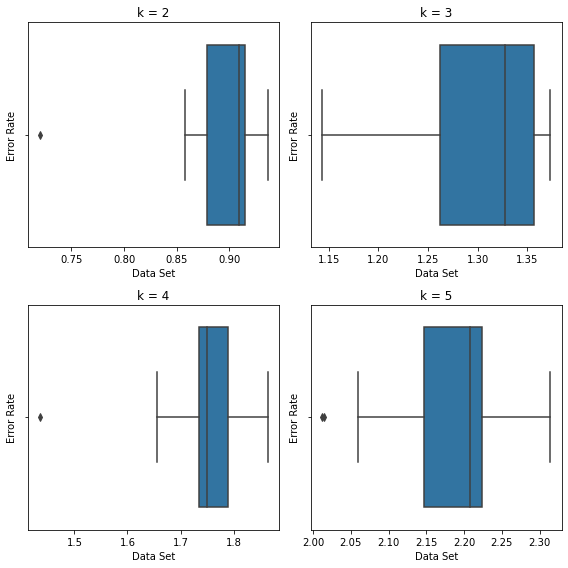

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axs = axs.flatten()

for i, k in enumerate(error_rates):
    sns.boxplot(x=error_rates[k], ax=axs[i])
    axs[i].set_title(f"k = {k}")
    axs[i].set_xlabel('Data Set')
    axs[i].set_ylabel('Error Rate')

plt.tight_layout()
plt.show()



SSE

In [16]:
def ck(tiny_data,k,threshold):
    sse=0
#     arr= np.asarray(tiny_data)
    #randlomly choosing indices using numpy library
    data = tiny_data.iloc[:, :-1].values
    last = tiny_data.iloc[:, -1].values
    index_val=np.random.choice(len(data), k, replace=False)
    rand_centroid= data[index_val]
#    print(rand_centroid)
    clust_ass=np.zeros(len(data))
    prev_centroids= rand_centroid.copy()
    for l in range(100):
        clust_ass= assign_data(data,rand_centroid)
        prev_centroids = rand_centroid.copy()
        new_centroids= u_centroids(data,clust_ass,k)
        new_sse= cal_sse(data,new_centroids,clust_ass)
#         avg_distance = np.sum(np.linalg.norm(new_centroids - prev_centroids, axis=1)) / len(new_centroids)
        if (sse-new_sse) < threshold:
            break
#         else:
#             break
    
#         prev_centroids = rand_centroids.copy()
#         rand_centroid = new_centroids.copy()
    
    cal= calculate_error_rate(data,new_centroids,clust_ass,last)

    return new_centroids,clust_ass,cal,new_sse
#     return new_centroids,clust_ass

def assign_data(data, centroids):
   # initializing distances to zero
    assign = np.zeros(len(data))
#     arr= np.asarray(centroids)
#     arr1= np.asarray(data)
    distances = np.zeros((len(data), 2))
    for index, point in enumerate(data):
        # using euclidean distace to calculate distances
        distance = [np.linalg.norm(point - centroid) for centroid in centroids]
        # selecting the minimum from it
        assign[index] = np.argmin(distance)  
    return assign

def u_centroids(data, cluster_assignments, k):
#     arr= np.asarray(data)
    centroids = np.zeros((k, data.shape[1]))
#     print(centroids)
    for i in range(k):
        centroids[i] = np.mean(data[cluster_assignments == i], axis=0)
    return centroids

def calculate_error_rate(data, centroids, cluster_assignments,last):
    error_rate = 0
    for i in range(len(centroids)):
        cluster_indices = np.where(cluster_assignments == i)[0]
        print(cluster_indices)
        yi = np.sum(last[cluster_indices] == '1')
        ni = np.sum(last[cluster_indices] == '0')
        #1e-8 is a small number added to avoid divided by 0 error
        if yi>ni:
            error_rate= error_rate+ (ni / (ni + yi + 1e-8))
        else:
            error_rate += (yi / (ni + yi + 1e-8))
         
#     error_rate /= len(centroids)
    return error_rate

def cal_sse(data, centroids, cluster_assignments):
    sse = 0
    for i in range(len(centroids)):
        cluster_indices = np.where(cluster_assignments == i)[0]
        sse += np.sum((data[cluster_indices] - centroids[i])**2)
    return sse
#     sse = 0
#     for i in range(len(centroids)):
#         cluster_indices = np.where(cluster_assignments == i)[0]
#         for j in range(len(cluster_indices)):
#             sse += np.sum((data[cluster_indices[j]] - centroids[i])**2)
#     print(sse)
#     return sse

In [17]:
ck(final_df, 2, 10)

[     1      2      3 ... 101761 101762 101765]
[     0      4     20 ... 101747 101763 101764]


(array([[8.73546871e+07, 1.79977924e+00, 4.60046517e-01, 6.17812512e+00,
         4.35778768e+00, 5.00601175e+01, 4.42920921e+01, 1.31743998e+00,
         1.60316947e+01, 5.08850081e-01, 2.49773328e-01, 6.62455158e-01,
         3.40949620e+02, 2.81953857e+02, 2.86833327e+02, 7.84507431e+00,
         1.98911972e+00, 1.90497497e+00, 1.19901841e+00, 1.02160287e+00,
         1.00837703e+00, 1.00055190e+00, 1.05335672e+00, 0.00000000e+00,
         1.12210746e+00, 1.09051129e+00, 1.97106477e-04, 1.07957188e+00,
         1.06445382e+00, 1.00364647e+00, 1.00039421e+00, 1.97106477e-05,
         1.37974534e-04, 1.40209721e+00, 1.00812079e+00, 0.00000000e+00,
         0.00000000e+00, 3.94212954e-05, 0.00000000e+00, 5.28324201e-01],
        [2.14989587e+07, 1.66618984e+00, 4.64825992e-01, 6.01575482e+00,
         4.43396300e+00, 4.30382113e+01, 4.19061765e+01, 1.36189058e+00,
         1.60120513e+01, 2.30678790e-01, 1.46202383e-01, 6.08833673e-01,
         3.32778551e+02, 2.74307141e+02, 2.8905216

In [18]:
from collections import defaultdict

dictionary_sse = defaultdict(list)
for k in range(2,6):
    for i in range(20):
        centroids, cluster_assignments, error_rate,sse = ck(final_df, k, 2)
        dictionary_sse[k].append(sse)
print(sse)

[     2      3      5 ... 101761 101762 101765]
[     0      1      4 ... 101760 101763 101764]
[     0      4     20 ... 101747 101763 101764]
[     1      2      3 ... 101761 101762 101765]
[     0     29     34 ... 101482 101542 101725]
[     1      2      3 ... 101763 101764 101765]
[     7     10     16 ... 101758 101761 101765]
[     0      1      2 ... 101762 101763 101764]
[     0      1      2 ... 101763 101764 101765]
[    34     57     66 ... 101080 101177 101184]
[     1      2      3 ... 101763 101764 101765]
[     0     20     21 ... 101482 101542 101725]
[     0     29     34 ... 101340 101482 101725]
[     1      2      3 ... 101763 101764 101765]
[     7     17     18 ... 101758 101761 101765]
[     0      1      2 ... 101762 101763 101764]
[     1      2      3 ... 101761 101762 101765]
[     0      4      8 ... 101760 101763 101764]
[     0      1      2 ... 101762 101763 101764]
[     7     17     18 ... 101758 101761 101765]
[     0     29     34 ... 101340 101482 

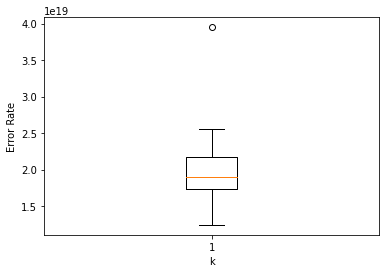

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sse_values_for_k = dictionary_sse[k]
fig, ax = plt.subplots()
ax.boxplot(sse_values_for_k)
ax.set_ylabel('Error Rate')
ax.set_xlabel('k')
plt.show()


In [28]:
import numpy as np
import pandas as pd

def kmeansplus(data, k, threshold):
    sse=0
    data = data.iloc[:, :-1].values
    last = data[:, -1]
    # Step 1a: Choose one center c1, uniformly at random from X
    rand_index = np.random.choice(data.shape[0], 1)
    rand_centroid = data[rand_index]

    # Step 1b: Choose k-1 centers ci, choosing x∈X with probability D(x)
    for i in range(1, k):
        distances = np.zeros(data.shape[0])
        for j in range(i):
            # Calculate distances to previous centroids
            distances += np.linalg.norm(data - rand_centroid[j], axis=1)**2
        p = distances / np.sum(distances)
        rand_index = np.random.choice(data.shape[0], 1, p=p)
        rand_centroid = np.vstack((rand_centroid, data[rand_index]))

    # Step 2-4: Proceed as with the standard k-means algorithm
    clust_ass = np.zeros(data.shape[0])
    prev_centroids = rand_centroid.copy()

    for l in range(100):
        clust_ass = assign_data(data, rand_centroid)
        prev_centroids = rand_centroid.copy()
        new_centroids = u_centroids(data, clust_ass, k)
        new_sse= cal_sse(data,new_centroids,clust_ass)
#         avg_distance = np.sum(np.linalg.norm(new_centroids - prev_centroids, axis=1)) / len(new_centroids)
        if (sse-new_sse) < threshold:
            break
#         avg_distance = np.sum(np.linalg.norm(new_centroids - prev_centroids, axis=1)) / len(new_centroids)
#         if avg_distance < threshold:
#             continue
#         else:
#             break

    cal = calculate_error_rate(data, new_centroids, clust_ass, last)

    return new_centroids, clust_ass, new_sse,cal

def assign_data(data, centroids):
    # initializing distances to zero
    assign = np.zeros(len(data))
    distances = np.zeros((len(data), 2))
    for index, point in enumerate(data):
        # using euclidean distace to calculate distances
        distance = [np.linalg.norm(point - centroid) for centroid in centroids]
        # selecting the minimum from it
        assign[index] = np.argmin(distance)  
    return assign

def u_centroids(data, cluster_assignments, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(data[cluster_assignments == i], axis=0)
    return centroids
def calculate_error_rate(data, centroids, cluster_assignments,last):
    error_rate = 0
    for i in range(len(centroids)):
        cluster_indices = np.where(cluster_assignments == i)[0]
#         print(cluster_indices)
        yi = np.sum(last[cluster_indices] == 1)
        ni = np.sum(last[cluster_indices] == 0)
#         print(f"for cluster {i}, yi = {yi}, and ni = {ni}")
        if yi>ni:
            error_rate= error_rate+ (ni / (ni + yi + 1e-8))
        else:
            error_rate += (yi / (ni + yi + 1e-8))
         
    error_rate /= len(centroids)
    return error_rate

def cal_sse(data, centroids, cluster_assignments):
    sse = 0
    for i in range(len(centroids)):
        cluster_indices = np.where(cluster_assignments == i)[0]
        sse += np.sum((data[cluster_indices] - centroids[i])**2)
    return sse

In [29]:
%%time

from collections import defaultdict

kmeans_SSE = defaultdict(list)
for k in range(2,6):
#     error_rates[k] = {}
    for i in range(20):
        # Tiny data
        centroids, cluster_assignments, sse,error = kmeansplus(final_df, k, 0.1)
        kmeans_SSE[k].append(sse)

CPU times: user 6min 5s, sys: 19.1 s, total: 6min 24s
Wall time: 6min 8s


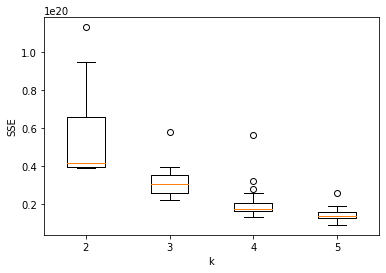

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots()
ax.boxplot(kmeans_SSE.values())
ax.set_xticklabels(kmeans_SSE.keys())
ax.set_ylabel('SSE')
ax.set_xlabel('k')
plt.show()

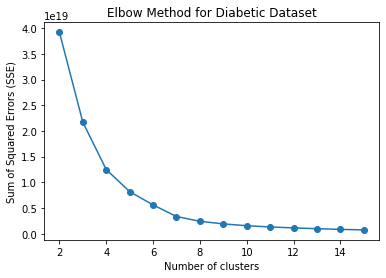

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sse = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(final_df)
    sse.append(kmeans.inertia_)

# Plot SSE against k
plt.plot(range(2, 16), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Diabetic Dataset')
plt.show()
